In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [ ]:
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Unzippin the zip file





In [ ]:
zip_ref = ZipFile('/content/drive/MyDrive/Colab Notebooks/Computer_Vision/rome_weather.zip')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Computer_Vision')
zip_ref.close()

NameError: ignored

In [ ]:
data_dir= '/content/drive/MyDrive/Colab Notebooks/Computer_Vision/rome_weather'

In [ ]:
train_gen=keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=30,
    width_shift_range=.2,
    # height_shift_range=.2,
    # shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    brightness_range=[.4,1.5],
    validation_split=.20,
    fill_mode='nearest',
  
    
)


In [ ]:
test_gen=keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    # validation_split=.20
)

In [ ]:
img_size=190
train_ds=train_gen.flow_from_directory(
    directory=data_dir,
    target_size=(img_size,img_size),
    seed=7,
    class_mode='sparse',
    batch_size=25,
    subset='training',
    
)
test_ds=test_gen.flow_from_directory(
    directory=data_dir,
    target_size=(img_size,img_size),
    seed=7,
    class_mode='sparse',
    batch_size=25,
    subset='validation',
    
    
)


Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


creating Model

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
model=keras.Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(img_size,img_size,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))   


In [ ]:
model.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,validation_data=test_ds,epochs=25)

Epoch 1/25
8/8 [==============================] - 113s 15s/step - loss: 0.7853 - accuracy: 0.6800 - val_loss: 0.6200 - val_accuracy: 0.7600
Epoch 2/25
8/8 [==============================] - 111s 14s/step - loss: 0.7210 - accuracy: 0.7250 - val_loss: 0.8169 - val_accuracy: 0.7200
Epoch 3/25
8/8 [==============================] - 110s 14s/step - loss: 0.8312 - accuracy: 0.6150 - val_loss: 0.7424 - val_accuracy: 0.7400
Epoch 4/25
8/8 [==============================] - 103s 13s/step - loss: 0.8570 - accuracy: 0.6600 - val_loss: 0.7718 - val_accuracy: 0.7000
Epoch 5/25
8/8 [==============================] - 99s 12s/step - loss: 0.8194 - accuracy: 0.6900 - val_loss: 0.5943 - val_accuracy: 0.8400
Epoch 6/25
8/8 [==============================] - 97s 12s/step - loss: 0.7882 - accuracy: 0.6850 - val_loss: 0.5876 - val_accuracy: 0.7800
Epoch 7/25
8/8 [==============================] - 96s 12s/step - loss: 0.7407 - accuracy: 0.7000 - val_loss: 0.6462 - val_accuracy: 0.7400
Epoch 8/25
8/8 [=======

Text(0.5, 0, 'epochs')

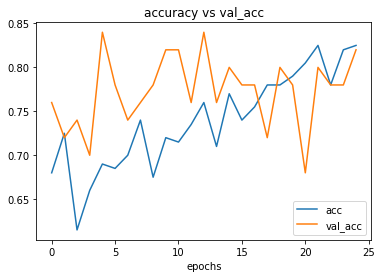

In [ ]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.title('accuracy vs val_acc')
plt.legend()
plt.xlabel('epochs')

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_ds, batch_size=20)
print("test loss, test acc:", results)

Evaluate on test data
2/2 [==============================] - 6s 3s/step - loss: 0.6670 - accuracy: 0.8200
test loss, test acc: [0.6669922471046448, 0.8199999928474426]


In [ ]:
# train_gene = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     zca_epsilon=1e-06,
#     rotation_range=0,
#     width_shift_range=0.0,
#     height_shift_range=0.0,
#     brightness_range=None,
#     shear_range=0.0,
#     zoom_range=0.0,
#     channel_shift_range=0.0,
#     fill_mode='nearest',
#     cval=0.0,
#     horizontal_flip=False,
#     vertical_flip=False,
#     rescale=None,
#     preprocessing_function=None,
#     data_format=None,
#     validation_split=0.0,
#     interpolation_order=1,
#     dtype=None
# )

Applying another model

In [ ]:
# augmentation pipeline
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)


In [ ]:
# spliting the data into train & validation
data_dir= '/content/drive/MyDrive/Colab Notebooks/Computer_Vision/rome_weather'
train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(190,190),
    color_mode="rgb",
    batch_size=32,
    class_mode="input",
    shuffle=True,
    seed=42,
    subset='training',
    
)
test_generator = test_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(190,190),
    color_mode="rgb",
    batch_size=32,
    class_mode="input",
    shuffle=True,
    seed=42,
    subset='validation',
)

Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
model_2=keras.Sequential()
  
model_2.add(Conv2D(360, 3, padding='same', activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Dropout(0.3))

model_2.add(Conv2D(180, 3, padding='same', activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Dropout(0.3))

# model_2.add(Conv2D(200, 3, padding='same', activation='relu'),)
# model_2.add(MaxPooling2D())
# model_2.add(Dropout(0.2))

model_2.add(Conv2D(180, 3, padding='same', activation='relu'))  
model_2.add(MaxPooling2D())
model_2.add(Dropout(0.2))

model_2.add(Conv2D(150, 3, padding='same', activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Dropout(0.1))
 

model_2.add(Flatten())
model_2.add(Dense(500, activation='relu'))
model_2.add(Dense(5,activation='softmax'))


In [ ]:
model_2.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

In [ ]:
history= model_2.fit(train_generator,validation_data=test_generator,epochs=25)

Epoch 1/25


InvalidArgumentError: ignored